# IRIS FLOWER CLASSIFICATION 🌸

## 📘 PROBLEM DEFINITION

- The Iris flower classification problem is a supervised multi-class classification task where the goal is to predict the species of an Iris flower based on its morphological features:

   - Sepal Length (cm)

   - Sepal Width (cm)

   - Petal Length (cm)

   - Petal Width (cm)

## 📦 LOAD THE IRIS DATASET

In [102]:
# import package
import pandas as pd
data=pd.read_csv(r"C:\Users\Dell\OneDrive\Nareshit\DataScienceandAI\Datafiles\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 🔍 DATA INSPECTION

In [104]:
# View the first 5 rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
# View the last 5 rows
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [108]:
# Check data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [110]:
# Summary statistics
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 🧹 DATA CLEANING

In [112]:
# Check for missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 📈 EXPPLORATORY DATA ANALYSIS

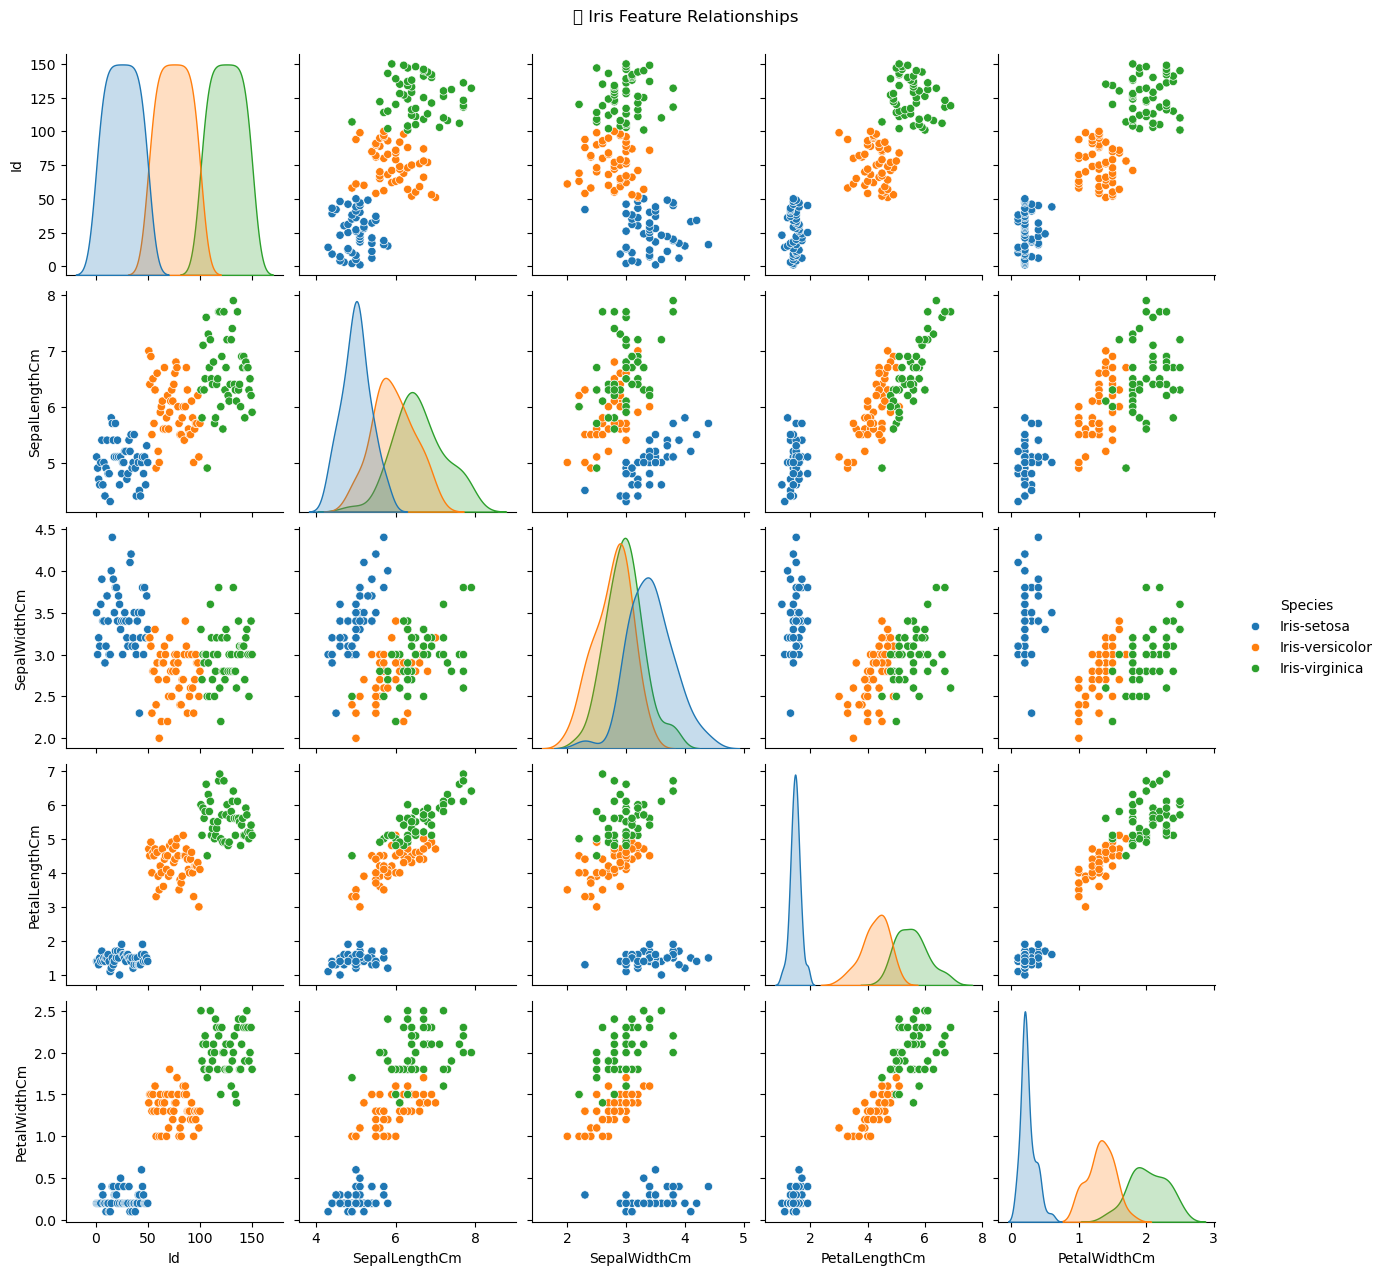

In [114]:
# 📊 Pairplot Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
sns.pairplot(data, hue='Species')
plt.suptitle("🌸 Iris Feature Relationships", y=1.02)
plt.show()

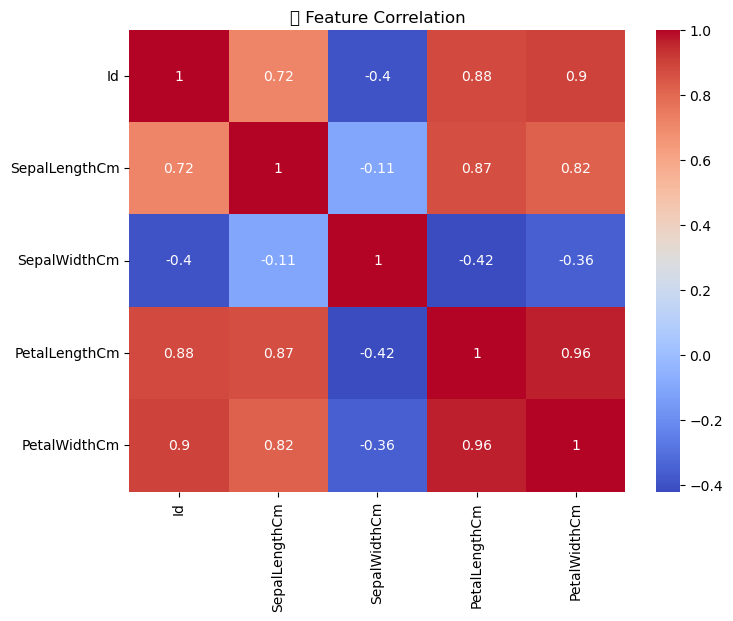

In [116]:
# 📌 Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("🔗 Feature Correlation")
plt.show()

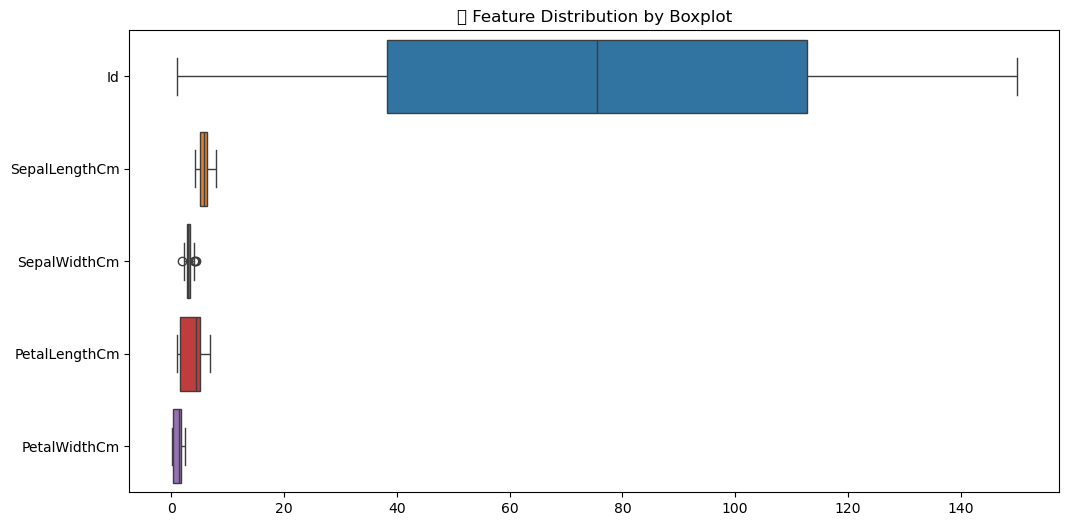

In [118]:
# 💠 Boxplot for Feature Distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="h")
plt.title("📦 Feature Distribution by Boxplot")
plt.show()

## 🎯 TRAIN TEST SPLIT

In [120]:
# Features and Target
X = data.drop('Species', axis=1)
y = data['Species']

In [122]:
# 🏷️ Encode class labels (e.g., setosa -> 0, versicolor -> 1, etc.)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [124]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## ⚖️ FEATURE SCALING

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖	MODEL SELECTION & TRAINING

In [128]:
# 🌲 Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## 🧪	MODEL EVALUATION

In [130]:
# 🔍 Predictions
y_pred = model.predict(X_test_scaled)

In [132]:
# 📊 Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 1.0
📋 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

📉 Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


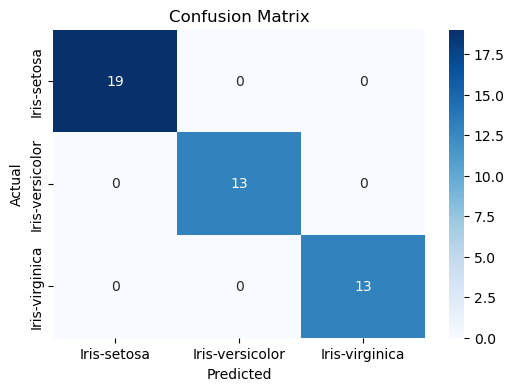

In [134]:
# 🔁 Visual Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 💾 SAVE THE MODEL

In [136]:
import joblib

# Save the trained model
joblib.dump(model, 'iris_random_forest_model.pkl')

# Save the scaler and label encoder too
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("✅ Model and preprocessing tools saved successfully.")


✅ Model and preprocessing tools saved successfully.


## 🔄 LOAD THE MODEL

In [138]:
# Load everything
model = joblib.load('iris_random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')
le = joblib.load('label_encoder.pkl')